# Individual Analysis of IntroDH Project
### Xinran Liu
### r1069247

## 2. Descriptive Analysis of the DramaDataset

### 2.1 Data processing for the analysis of Number of Publications over Decade

In [1]:
import pandas as pd
import numpy as np

input_file = 'dh_group7_drama_251229.csv'
df = pd.read_csv(input_file)

print(f"Original Row Count: {len(df)}")

# Clean author column

df['Cleaned_Author'] = df['author (n)']

# use other author if main author is missing
if 'other author (n)' in df.columns:
    # fillna() checks if Cleaned_Author is empty; if so, it takes the value from 'other author (n)'
    df['Cleaned_Author'] = df['Cleaned_Author'].fillna(df['other author (n)'])

# fill remaining missing values with 'Unknown'
df['Cleaned_Author'] = df['Cleaned_Author'].fillna('Unknown')

# drop rows without year
df = df.dropna(subset=['p year'])

# convert year to integer
df['Publication_Year'] = df['p year'].astype(int)

# create decade column
df['Decade_Label'] = ((df['Publication_Year'] // 10) * 10).astype(str) + 's'

# publisher location
if 'p location' in df.columns:
    df['Publisher_Location'] = df['p location'].fillna('Unknown').astype(str)

# publisher name
if 'p name' in df.columns:
    df['Publisher_Name'] = df['p name'].fillna('Unknown').astype(str)

# title
if 'title (n)' in df.columns:
    df['Cleaned_Title'] = df['title (n)'].fillna('Unknown').astype(str)

# genre
if 'type' in df.columns:
    df['Genre_Type'] = df['type'].fillna('Unknown').astype(str)

# Define the list of columns for Tableau
columns_to_keep = [
    'Publication_Year', 
    'Decade_Label', 
    'Cleaned_Author', 
    'Cleaned_Title', 
    'Publisher_Location', 
    'Publisher_Name',
    'Genre_Type'
]

final_columns = []
for col in columns_to_keep:
    if col in df.columns:
        final_columns.append(col)

df_final = df[final_columns]

df_final.to_csv('drama_master_cleaned_final.csv', index=False)

print("Final Row Count:", len(df_final))
print(df_final.head())

Original Row Count: 1615
Final Row Count: 1611
   Publication_Year Decade_Label                  Cleaned_Author  \
0              1791        1790s             inchbald, elizabeth   
1              1809        1800s                         Unknown   
2              1788        1780s  claris de florian, jean pierre   
3              1641        1640s                         Unknown   
4              1788        1780s                         sedaine   

                                       Cleaned_Title Publisher_Location  \
0      next door neighbours; a comedy; in three acts             london   
1          the traveller; or, the marriage in sicily             london   
2          look before you leap. a comedy in one act             london   
3  mercurius britanicus; or, the english intellig...             london   
4            a key to the lock, a comedy in two acts             london   

   Publisher_Name Genre_Type  
0         Unknown     comedy  
1         Unknown     comedy  


### 2.2. Data processing for the analysis of authors over decade

In [2]:
# Separate 'Unknown' from Identified Authors
unknown_df = df_final[df_final['Cleaned_Author'] == 'Unknown']
identified_df = df_final[df_final['Cleaned_Author'] != 'Unknown']

# Basic Statistics
total_records = len(df_final)
unknown_count = len(unknown_df)
identified_count = len(identified_df)
unique_authors_count = identified_df['Cleaned_Author'].nunique()

# Calculate the percentage of unknown works
unknown_percentage = (unknown_count / total_records) * 100

print(f"Total Records: {total_records}")
print(f"Identified Works: {identified_count}")
print(f"Unknown/Missing Authors: {unknown_count} ({unknown_percentage:.2f}%)")
print(f"Total Unique Identified Authors: {unique_authors_count}")

# Find Top Authors
author_counts = identified_df['Cleaned_Author'].value_counts()

print(f"\nTop 10 Most Prolific Authors")
print(author_counts.head(10))

# How many plays the average author writes
avg_productivity = identified_count / unique_authors_count
print(f"\nAverage plays per author: {avg_productivity:.2f}")

# Decade Analysis (Who was active when?)
authors_per_decade = df_final.groupby('Decade_Label')['Cleaned_Author'].nunique()

print(f"\nUnique Authors Active per Decade")
print(authors_per_decade.sort_index())

Total Records: 1611
Identified Works: 1381
Unknown/Missing Authors: 230 (14.28%)
Total Unique Identified Authors: 850

Top 10 Most Prolific Authors
Cleaned_Author
cumberland, richard    24
dryden, john           21
shadwell, thomas       19
shirley, james         18
foote, samuel          14
lee, nathaniel         14
william shakespeare    14
d'urfey, thomas        11
murphy, arthur         11
behn, aphra            10
Name: count, dtype: int64

Average plays per author: 1.62

Unique Authors Active per Decade
Decade_Label
1540s      1
1590s      1
1600s      6
1610s      5
1620s      5
1630s     30
1640s     17
1650s     22
1660s     29
1670s     41
1680s     32
1690s     36
1700s     21
1710s      8
1720s      6
1730s     10
1740s      7
1750s     16
1760s     19
1770s     25
1780s     37
1790s     45
1800s     64
1810s     69
1820s     61
1830s     34
1840s     24
1850s     44
1860s     31
1870s     60
1880s     92
1890s    171
1900s      4
1910s      1
1920s      1
Name: Cleaned_Aut

### 2.3 Publishers and publication trends over time

In [8]:
import pandas as pd
file_path = 'drama_master_cleaned_final.csv'
df = pd.read_csv(file_path)

df['Publisher_Name'] = df['Publisher_Name'].fillna('Unknown')
# Calculate Total Publishers and Missing Rate
total_rows = len(df)

unknown_rows = len(df[df['Publisher_Name'] == 'Unknown'])

missing_rate_global = (unknown_rows / total_rows) * 100

# Count unique publishers (excluding 'Unknown')
known_publishers_df = df[df['Publisher_Name'] != 'Unknown']
total_publishers_count = known_publishers_df['Publisher_Name'].nunique()

print(f"Total Unique Publishers: {total_publishers_count}")
print(f"Global Missing Data Rate: {missing_rate_global:.2f}%")

# Find Top 10 Publishers
top_publishers = known_publishers_df['Publisher_Name'].value_counts().reset_index()
top_publishers.columns = ['Publisher_Name', 'Publication_Count']

top_10_df = top_publishers.head(10)

top_10_df.to_csv('viz_top10_publishers.csv', index=False)
print("Saved: 'viz_top10_publishers.csv'")

# CR3 Analysis per Decade

results_list = []

decades = sorted(df['Decade_Label'].unique())

for decade in decades:
    
    # 1. Get data for this specific decade
    decade_data = df[df['Decade_Label'] == decade]
    total_in_decade = len(decade_data)
    
    # 2. Calculate Missing Rate for this decade
    unknown_in_decade = len(decade_data[decade_data['Publisher_Name'] == 'Unknown'])
    decade_missing_rate = (unknown_in_decade / total_in_decade) * 100
    
    # 3. Calculate Market Share for known publishers
    # Filter out 'Unknown' to find the top real publishers
    known_data = decade_data[decade_data['Publisher_Name'] != 'Unknown']
    
    # Count publications for each publisher in this decade
    publisher_counts = known_data['Publisher_Name'].value_counts()
    
    # 4. Find Top 3 and calculate CR3
    # If there are no known publishers, CR3 is 0
    if len(publisher_counts) == 0:
        cr3_value = 0
        top1 = "None"
        top2 = "None"
        top3 = "None"
    else:
        market_shares = (publisher_counts / total_in_decade) * 100
        
        # Take the top 3
        top_3_shares = market_shares.head(3)
        cr3_value = top_3_shares.sum()
        
        names = top_3_shares.index.tolist()
        top1 = names[0] if len(names) > 0 else "None"
        top2 = names[1] if len(names) > 1 else "None"
        top3 = names[2] if len(names) > 2 else "None"

    # 5. Determine Market Structure
    if cr3_value > 60:
        structure = "Oligopoly"
    elif cr3_value < 40:
        structure = "Free Competition"
    else:
        structure = "Moderate"

    # 6. Append data to our list
    results_list.append({
        'Decade_Label': decade,
        'CR3_Percentage': cr3_value,
        'Missing_Rate_Percentage': decade_missing_rate,
        'Market_Structure': structure,
        'Top1_Publisher': top1,
        'Top2_Publisher': top2,
        'Top3_Publisher': top3
    })

cr3_df = pd.DataFrame(results_list)

cr3_df.to_csv('viz_cr3_market_analysis.csv', index=False)
print("Saved: 'viz_cr3_market_analysis.csv'")

print("\nPreview of CR3 Data:")
print(cr3_df.head())

Total Unique Publishers: 624
Global Missing Data Rate: 42.33%
Saved: 'viz_top10_publishers.csv'
Saved: 'viz_cr3_market_analysis.csv'

Preview of CR3 Data:
  Decade_Label  CR3_Percentage  Missing_Rate_Percentage Market_Structure  \
0        1540s           100.0                 0.000000        Oligopoly   
1        1590s           100.0                 0.000000        Oligopoly   
2        1600s            50.0                33.333333         Moderate   
3        1610s            50.0                 0.000000         Moderate   
4        1620s            60.0                20.000000         Moderate   

               Top1_Publisher            Top2_Publisher  \
0  in ædibus tho. berthel[et]                      None   
1                 john danter                      None   
2                  mathew law    j. windet for e. blunt   
3             for iohn browne  w. stansby for j. parker   
4               for m. rhodes   n. o.  for thomas thorp   

                                 

### 3.1 Length of title over time

Max Title Length: 43 words
Min Title Length: 1 words
Avg Title Length: 7.90 words
Longest Title (1622): the troublesome raigne and lamentable death of edw...


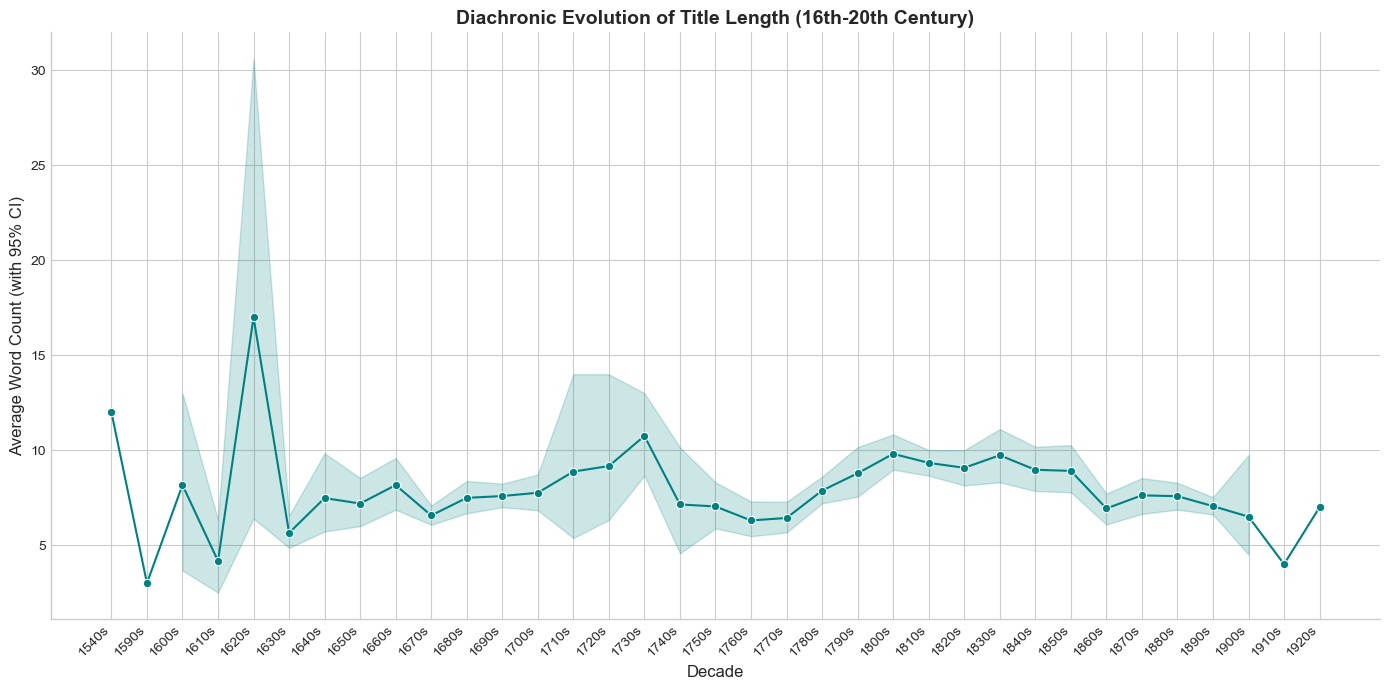

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drama_master_cleaned_final.csv')

# Ensure titles are strings and handle missing values
df['Cleaned_Title'] = df['Cleaned_Title'].astype(str).fillna('')
# coerce errors to handle any non-numeric year data
df['Publication_Year'] = pd.to_numeric(df['Publication_Year'], errors='coerce')

# Calculate Title Length
df['Title_Length'] = df['Cleaned_Title'].apply(lambda x: len(x.strip().split()))

#Ensure data is sorted by year
df = df.sort_values('Publication_Year')

print(f"Max Title Length: {df['Title_Length'].max()} words")
print(f"Min Title Length: {df['Title_Length'].min()} words")
print(f"Avg Title Length: {df['Title_Length'].mean():.2f} words")

# Identify the longest title for qualitative analysis
longest_row = df.loc[df['Title_Length'].idxmax()]
print(f"Longest Title ({longest_row['Publication_Year']}): {longest_row['Cleaned_Title'][:50]}...")

# Visualization
plt.figure(figsize=(14, 7))

sns.set_style("whitegrid") 

# Plotting the Line Chart
# errorbar=('ci', 95): This explicitly calculates the 95% Confidence Interval via bootstrapping.
# The shadow represents where the true population mean is likely to fall 95% of the time.
sns.lineplot(
    data=df, 
    x='Decade_Label', 
    y='Title_Length', 
    color='teal', 
    marker='o',
    errorbar=('ci', 95) 
)

# Chart Formatting
plt.title('Diachronic Evolution of Title Length (16th-20th Century)', fontsize=14, weight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Word Count (with 95% CI)', fontsize=12) # Clearly label the Y-axis metrics

# Rotate X-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Remove the top and right borders for a cleaner, modern look
sns.despine()

plt.tight_layout()
plt.show()

### 3.2 Geographic terms in the titles

In [10]:
from collections import Counter
import re

all_titles = ' '.join(df['Cleaned_Title']).lower()

# extract words and count their frequency
words = re.findall(r'\w+', all_titles)
word_counts = Counter(words)

# top 500
print(word_counts.most_common(500))


[('a', 1365), ('the', 1322), ('of', 598), ('in', 504), ('tragedy', 434), ('comedy', 416), ('acts', 392), ('or', 356), ('and', 268), ('etc', 266), ('five', 232), ('drama', 187), ('play', 127), ('three', 120), ('dramatic', 110), ('s', 104), ('an', 93), ('historical', 61), ('plays', 60), ('to', 55), ('two', 55), ('poem', 48), ('for', 47), ('king', 45), ('d', 42), ('comedie', 39), ('love', 37), ('on', 37), ('poems', 37), ('other', 37), ('with', 32), ('new', 32), ('musical', 30), ('four', 29), ('by', 28), ('from', 27), ('tragi', 27), ('wife', 26), ('life', 23), ('story', 22), ('one', 22), ('original', 22), ('man', 21), ('sir', 19), ('queen', 19), ('fatal', 19), ('novel', 18), ('his', 17), ('being', 17), ('all', 17), ('history', 17), ('country', 17), ('husband', 17), ('tale', 17), ('revenge', 16), ('fall', 16), ('first', 16), ('english', 16), ('at', 16), ('works', 16), ('shakespeare', 16), ('great', 15), ('death', 15), ('school', 15), ('daughter', 15), ('lovers', 14), ('lady', 14), ('tragic'

### Strategy for building bag-of-words for extracting GEO Terms

In [76]:
import pandas as pd
import re
from collections import Counter

# PART 1: Generate Top 500 Word List for Inspection

# Join all titles into one string and convert to lowercase
all_text = ' '.join(df['Cleaned_Title'].astype(str)).lower()

# Extract words using Regular Expressions (removes punctuation)
words = re.findall(r'\b\w+\b', all_text)

# Define Basic Stopwords to remove noise
basic_stopwords = {
    'the', 'a', 'an', 'of', 'and', 'in', 'to', 'or', 'for', 'with', 
    'on', 'at', 'by', 'from', 's', 'is', 'it', 'that', 'as', 'be', 'are'
}

# Filter out stopwords and single letters
filtered_words = [w for w in words if w not in basic_stopwords and len(w) > 1]

# Count Frequencies
counter_obj = Counter(filtered_words)
word_counts_top500 = counter_obj.most_common(500)

# 6. PRINT FOR HUMAN INSPECTION
print("Word : Frequency")

for rank, (word, freq) in enumerate(word_counts_top500, 1):
    print(f"({rank}) {word} : {freq}")

print(" Geographic terms will then be added to the dictionary")


Word : Frequency
(1) tragedy : 408
(2) acts : 392
(3) comedy : 388
(4) etc : 247
(5) five : 232
(6) drama : 186
(7) play : 127
(8) three : 120
(9) dramatic : 109
(10) historical : 61
(11) plays : 60
(12) two : 55
(13) poem : 48
(14) king : 39
(15) poems : 37
(16) other : 36
(17) love : 36
(18) musical : 30
(19) four : 29
(20) new : 25
(21) wife : 24
(22) one : 22
(23) original : 22
(24) story : 21
(25) life : 21
(26) tragi : 20
(27) man : 19
(28) fatal : 19
(29) novel : 18
(30) sir : 18
(31) queen : 18
(32) history : 17
(33) husband : 17
(34) country : 17
(35) tale : 17
(36) all : 16
(37) shakespeare : 16
(38) works : 16
(39) school : 15
(40) daughter : 15
(41) being : 15
(42) fall : 15
(43) first : 14
(44) his : 14
(45) english : 14
(46) act : 13
(47) tragic : 13
(48) revenge : 13
(49) st : 13
(50) de : 13
(51) shakspeare : 13
(52) marriage : 12
(53) lovers : 12
(54) great : 12
(55) la : 12
(56) death : 12
(57) dramas : 12
(58) old : 11
(59) comedies : 11
(60) lover : 11
(61) son : 11

In [77]:
import pandas as pd
import re
from collections import Counter

# PART 2.1 : Generate Dictionaries & Classification
                                  
# RE-RUN DATA PROCESSING (To ensure consistency)
all_text = ' '.join(df['Cleaned_Title'].astype(str)).lower()
words = re.findall(r'\b\w+\b', all_text)
basic_stopwords = {
    'the', 'a', 'an', 'of', 'and', 'in', 'to', 'or', 'for', 'with', 
    'on', 'at', 'by', 'from', 's', 'is', 'it', 'that', 'as', 'be', 'are'
}
filtered_words = [w for w in words if w not in basic_stopwords and len(w) > 1]
counter_obj = Counter(filtered_words)
word_counts_top500 = counter_obj.most_common(500)

# THESE LISTS ARE UPDATED BASED ON THE FINDINGS IN STEP 1
continental_terms = {
    'france', 'italy', 'spain', 'germany', 'greece', 'england', 'scotland', 'ireland', 'holland', 'netherlands', 
    'poland', 'russia', 'muscovy', 'sweden', 'denmark', 'portugal', 'austria', 'hungary', 'swiss', 'flanders',  
    'rome', 'paris', 'venice', 'naples', 'florence', 'verona', 'sicily', 'vienna', 'madrid', 'lisbon', 'seville', 
    'athens', 'sparta', 'troy', 'french', 'spanish', 'italian', 'german', 'dutch', 'english', 'scottish', 'irish', 
    'roman', 'grecian', 'greek', 'venetian', 'sicilian', 'polish', 'russian', 'dane', 'danish', 'portuguese', 
    'castilian', 'aragonese'
    # Add new Continental words here...
}

colonial_terms = {
    'america', 'new world', 'west indies', 'indies', 'western', 'atlantic', 'virginia', 'canada', 'quebec', 
    'carolina', 'florida', 'new york', 'boston', 'peru', 'mexico', 'brazil', 'panama', 'guiana', 'amazon', 
    'inca', 'aztec', 'montezuma', 'cortez', 'pizarro', 'jamaica', 'caribbean', 'barbados', 'cuba', 'haiti', 
    'domingo', 'bermudas', 'australia', 'botany bay', 'van diemen', 'colony', 'colonization', 'conquest', 
    'plantation', 'planter', 'slave', 'slavery', 'negro', 'savage', 'voyage', 'discovery', 'island', 'isle', 'indian'
    # Add new Colonial words here...
}

oriental_terms = {
    'china', 'chinese', 'japan', 'siam', 'cathay', 'tartary', 'tartar', 'mongol', 'india', 'east indies', 
    'mogul', 'agra', 'bengal', 'ceylon', 'persia', 'persian', 'turk', 'turkish', 'turkey', 'ottoman', 'sultan', 
    'mahomet', 'mohammed', 'constantinople', 'byzantium', 'seraglio', 'harem', 'islam', 'arabia', 'syria', 
    'egypt', 'egyptian', 'cairo', 'nile', 'alexandria', 'morocco', 'moor', 'moorish', 'algiers', 'tunis', 
    'tripoli', 'barbary', 'zara', 'babylon', 'assyria', 'cyrus', 'darius', 'xerxes', 'jerusalem', 'hebrew', 
    'jew', 'israel'
    # Add new Oriental words here...
}

# Container for storing results
classified_terms = {
    'Continental': [],
    'Colonial': [],
    'Oriental': []
}

# Loop: Iterate through the cleaned Top 500 list
for word, frequency in word_counts_top500:
    if word in continental_terms:
        classified_terms['Continental'].append((word, frequency)) 
    elif word in colonial_terms:
        classified_terms['Colonial'].append((word, frequency))
    elif word in oriental_terms:
        classified_terms['Oriental'].append((word, frequency))

print("\nContinental Terms Found (Top 500)")
print(classified_terms['Continental'])

print("\nColonial Terms Found (Top 500")
print(classified_terms['Colonial'])

print("\nOriental Terms Found (Top 500)")
print(classified_terms['Oriental'])



Continental Terms Found (Top 500)
[('english', 14), ('french', 9), ('england', 6), ('greek', 6), ('spanish', 5), ('italian', 5), ('roman', 5), ('venice', 5), ('irish', 4), ('poland', 4), ('russian', 3), ('rome', 3), ('sparta', 3), ('naples', 3), ('paris', 3), ('sicily', 2)]

Colonial Terms Found (Top 500
[('island', 5), ('slave', 5), ('indian', 4), ('conquest', 4), ('voyage', 4)]

Oriental Terms Found (Top 500)
[('china', 4), ('persia', 4), ('turkey', 3), ('morocco', 3), ('jew', 3), ('persian', 3)]


In [82]:
import pandas as pd
import re
from collections import Counter
import os
# STEP 2.2: DICTIONARY EXPANSION (Co-occurrence)

file_path = 'drama_master_cleaned_final.csv'

# Pre-processing
df['analysis_text'] = df['Cleaned_Title'].astype(str).str.lower()

# Tokenize entire corpus 
all_text = ' '.join(df['analysis_text'])
words = re.findall(r'\b[a-z]+\b', all_text)

print(f"Total raw words extracted: {len(words)}")

# Apply Filters (Stopwords & Length)
# Define standard noise words
stopwords = set(['the', 'and', 'for', 'with', 'that', 'this', 'from', 'but', 'not', 
                 'play', 'drama', 'tragedy', 'comedy', 'opera', 'farce', 
                 'act', 'scene', 'prologue', 'epilogue', 'enter', 'exit',
                 'new', 'old', 'part', 'being', 'entitled'])

filtered_words = [w for w in words if w not in stopwords and len(w) > 1]

common_words = Counter(filtered_words).most_common(500)

print("\nTop 100 Most Frequent Words in Corpus")
print("Format: (Word, Frequency)")
for rank, (word, freq) in enumerate(common_words, 1):
    print(f"{rank}. {word}: {freq}")

Imperial_seeds = [
    'america', 'new world', 'west indies', 'indies', 'western', 'atlantic', 'virginia', 'canada', 'quebec', 
    'carolina', 'florida', 'new york', 'boston', 'peru', 'mexico', 'brazil', 'panama', 'guiana', 'amazon', 
    'inca', 'aztec', 'montezuma', 'cortez', 'pizarro', 'jamaica', 'caribbean', 'barbados', 'cuba', 'haiti', 
    'domingo', 'bermudas', 'australia', 'botany bay', 'van diemen', 'colony', 'colonization', 'conquest', 
    'plantation', 'planter', 'slave', 'slavery', 'negro', 'savage', 'voyage', 'discovery', 'island', 'isle', 'indian'
]

oriental_seeds = [
'china', 'chinese', 'japan', 'siam', 'cathay', 'tartary', 'tartar', 'mongol', 'india', 'east indies', 
    'mogul', 'agra', 'bengal', 'ceylon', 'persia', 'persian', 'turk', 'turkish', 'turkey', 'ottoman', 'sultan', 
    'mahomet', 'mohammed', 'constantinople', 'byzantium', 'seraglio', 'harem', 'islam', 'arabia', 'syria', 
    'egypt', 'egyptian', 'cairo', 'nile', 'alexandria', 'morocco', 'moor', 'moorish', 'algiers', 'tunis', 
    'tripoli', 'barbary', 'zara', 'babylon', 'assyria', 'cyrus', 'darius', 'xerxes', 'jerusalem', 'hebrew', 
    'jew', 'israel'
]

European_seeds = [
   'france', 'italy', 'spain', 'germany', 'greece', 'england', 'scotland', 'ireland', 'holland', 'netherlands', 
    'poland', 'russia', 'muscovy', 'sweden', 'denmark', 'portugal', 'austria', 'hungary', 'swiss', 'flanders',  
    'rome', 'paris', 'venice', 'naples', 'florence', 'verona', 'sicily', 'vienna', 'madrid', 'lisbon', 'seville', 
    'athens', 'sparta', 'troy', 'french', 'spanish', 'italian', 'german', 'dutch', 'english', 'scottish', 'irish', 
    'roman', 'grecian', 'greek', 'venetian', 'sicilian', 'polish', 'russian', 'dane', 'danish', 'portuguese', 
    'castilian', 'aragonese'
]

seed_concepts = {
    'Imperial_Expansion': imperial_seeds,
    'Oriental_Expansion': oriental_seeds,
    'European_Expansion': european_seeds
}

# DEFINE STOPWORDS (Aggressive Filtering)
stopwords = set([
    'the', 'and', 'for', 'with', 'that', 'play', 'comedy', 'tragedy', 
    'entitled', 'called', 'act', 'scene', 'part', 'history', 'opera', 
    'farce', 'entertainment', 'sketch', 'acts', 'five', 'three', 'two',
    'one', 'first', 'second', 'new', 'old', 'man', 'woman', 'king', 
    'queen', 'love', 'life', 'death', 'prologue', 'epilogue', 'drama',
    'written', 'performed', 'royal', 'theatre', 'majesty', 'late',
    'great', 'fair', 'young', 'rich', 'poor', 'good', 'bad', 'english', 'etc'
])
for label, seeds in seed_concepts.items():
    print(f"Titles containing {label} seeds...")
    related_words = Counter()
    
    # Iterate through every title 
    for text in df:
        text_str = str(text)
        
        # Tokenize: simple regex for words
        title_words = set(re.findall(r'\b[a-z]+\b', text_str))
        
        # LOGIC: Title-Level Co-occurrence
        # If the title contains ANY seed from this category...
        if not title_words.isdisjoint(seeds):
            # ... count ALL other words in that title.
            for w in title_words:
                # Filter: Not a seed, not a stopword, length > 2
                if w not in seeds and w not in stopwords and len(w) > 2:
                    related_words[w] += 1
    
    # OUTPUT
    print(f"   >>> Candidates for {label} Dictionary:")
    
    # Get Top 60 to ensure we catch rarer place names
    top_candidates = related_words.most_common(60)
    
    # Format clearly
    print(f"   {', '.join([f'{w}({c})' for w, c in top_candidates])}")
import pandas as pd
import re
from collections import Counter
import os
# STEP 2.2: DICTIONARY EXPANSION (Co-occurrence)

file_path = 'drama_master_cleaned_final.csv'

# Pre-processing
df['analysis_text'] = df['Cleaned_Title'].astype(str).str.lower()

# Tokenize entire corpus 
all_text = ' '.join(df['analysis_text'])
words = re.findall(r'\b[a-z]+\b', all_text)

print(f"Total raw words extracted: {len(words)}")

# Apply Filters (Stopwords & Length)
# Define standard noise words
stopwords = set(['the', 'and', 'for', 'with', 'that', 'this', 'from', 'but', 'not', 
                 'play', 'drama', 'tragedy', 'comedy', 'opera', 'farce', 
                 'act', 'scene', 'prologue', 'epilogue', 'enter', 'exit',
                 'new', 'old', 'part', 'being', 'entitled'])

filtered_words = [w for w in words if w not in stopwords and len(w) > 1]

common_words = Counter(filtered_words).most_common(500)

print("\nTop 100 Most Frequent Words in Corpus")
print("Format: (Word, Frequency)")
for rank, (word, freq) in enumerate(common_words, 1):
    print(f"{rank}. {word}: {freq}")

Imperial_seeds = [
    'america', 'new world', 'west indies', 'indies', 'western', 'atlantic', 'virginia', 'canada', 'quebec', 
    'carolina', 'florida', 'new york', 'boston', 'peru', 'mexico', 'brazil', 'panama', 'guiana', 'amazon', 
    'inca', 'aztec', 'montezuma', 'cortez', 'pizarro', 'jamaica', 'caribbean', 'barbados', 'cuba', 'haiti', 
    'domingo', 'bermudas', 'australia', 'botany bay', 'van diemen', 'colony', 'colonization', 'conquest', 
    'plantation', 'planter', 'slave', 'slavery', 'negro', 'savage', 'voyage', 'discovery', 'island', 'isle', 'indian'
]

oriental_seeds = [
'china', 'chinese', 'japan', 'siam', 'cathay', 'tartary', 'tartar', 'mongol', 'india', 'east indies', 
    'mogul', 'agra', 'bengal', 'ceylon', 'persia', 'persian', 'turk', 'turkish', 'turkey', 'ottoman', 'sultan', 
    'mahomet', 'mohammed', 'constantinople', 'byzantium', 'seraglio', 'harem', 'islam', 'arabia', 'syria', 
    'egypt', 'egyptian', 'cairo', 'nile', 'alexandria', 'morocco', 'moor', 'moorish', 'algiers', 'tunis', 
    'tripoli', 'barbary', 'zara', 'babylon', 'assyria', 'cyrus', 'darius', 'xerxes', 'jerusalem', 'hebrew', 
    'jew', 'israel'
]

European_seeds = [
   'france', 'italy', 'spain', 'germany', 'greece', 'england', 'scotland', 'ireland', 'holland', 'netherlands', 
    'poland', 'russia', 'muscovy', 'sweden', 'denmark', 'portugal', 'austria', 'hungary', 'swiss', 'flanders',  
    'rome', 'paris', 'venice', 'naples', 'florence', 'verona', 'sicily', 'vienna', 'madrid', 'lisbon', 'seville', 
    'athens', 'sparta', 'troy', 'french', 'spanish', 'italian', 'german', 'dutch', 'english', 'scottish', 'irish', 
    'roman', 'grecian', 'greek', 'venetian', 'sicilian', 'polish', 'russian', 'dane', 'danish', 'portuguese', 
    'castilian', 'aragonese'
]

seed_concepts = {
    'Imperial_Expansion': imperial_seeds,
    'Oriental_Expansion': oriental_seeds,
    'European_Expansion': european_seeds
}

# DEFINE STOPWORDS (Aggressive Filtering)
stopwords = set([
    'the', 'and', 'for', 'with', 'that', 'play', 'comedy', 'tragedy', 
    'entitled', 'called', 'act', 'scene', 'part', 'history', 'opera', 
    'farce', 'entertainment', 'sketch', 'acts', 'five', 'three', 'two',
    'one', 'first', 'second', 'new', 'old', 'man', 'woman', 'king', 
    'queen', 'love', 'life', 'death', 'prologue', 'epilogue', 'drama',
    'written', 'performed', 'royal', 'theatre', 'majesty', 'late',
    'great', 'fair', 'young', 'rich', 'poor', 'good', 'bad', 'english', 'etc'
])
for label, seeds in seed_concepts.items():
    print(f"Titles containing {label} seeds...")
    related_words = Counter()
    
    # Iterate through every title 
    for text in df:
        text_str = str(text)
        
        # Tokenize: simple regex for words
        title_words = set(re.findall(r'\b[a-z]+\b', text_str))
        
        # LOGIC: Title-Level Co-occurrence
        # If the title contains ANY seed from this category...
        if not title_words.isdisjoint(seeds):
            # ... count ALL other words in that title.
            for w in title_words:
                # Filter: Not a seed, not a stopword, length > 2
                if w not in seeds and w not in stopwords and len(w) > 2:
                    related_words[w] += 1
    
    # OUTPUT
    print(f"   >>> Candidates for {label} Dictionary:")
    
    # Get Top 60 to ensure we catch rarer place names
    top_candidates = related_words.most_common(60)
    
    # Format clearly
    print(f"   {', '.join([f'{w}({c})' for w, c in top_candidates])}")


Total raw words extracted: 12993

Top 100 Most Frequent Words in Corpus
Format: (Word, Frequency)
1. of: 598
2. in: 504
3. acts: 392
4. or: 356
5. etc: 266
6. five: 232
7. three: 120
8. dramatic: 110
9. an: 93
10. historical: 61
11. plays: 60
12. to: 55
13. two: 55
14. poem: 48
15. king: 45
16. comedie: 39
17. on: 37
18. other: 37
19. poems: 37
20. love: 37
21. musical: 30
22. four: 29
23. by: 28
24. tragi: 27
25. wife: 26
26. life: 23
27. one: 22
28. original: 22
29. story: 22
30. man: 21
31. sir: 19
32. queen: 19
33. fatal: 19
34. novel: 18
35. all: 17
36. history: 17
37. husband: 17
38. country: 17
39. his: 17
40. tale: 17
41. english: 16
42. at: 16
43. first: 16
44. revenge: 16
45. shakespeare: 16
46. works: 16
47. fall: 16
48. school: 15
49. daughter: 15
50. great: 15
51. death: 15
52. tragic: 14
53. lady: 14
54. lovers: 14
55. pleasant: 13
56. is: 13
57. written: 13
58. st: 13
59. de: 13
60. shakspeare: 13
61. marriage: 12
62. lover: 12
63. la: 12
64. duke: 12
65. dramas: 12
66. 

In [96]:
import pandas as pd
import re
from collections import Counter

# STEP 2.2: DICTIONARY EXPANSION (Co-occurrence)

imperial_seeds = [
    'empire', 'colony', 'colonial', 'plantation', 'slave', 'slaves', 
    'indian', 'indies', 'ocean', 'west', 'voyage', 'island', 'virginia', 
    'conquest', 'merchant', 'siege', 'jamaica', 'bengal'
]

oriental_seeds = [
    'sultan', 'mogul', 'harem', 'seraglio', 'east', 'china', 'chinese',
    'persia', 'persian', 'turk', 'turkey', 'morocco', 'algiers', 'algeria', 
    'egypt', 'arab', 'tartar', 'tartary'
]

european_seeds = [
    'europe', 'german', 'dutch', 'french', 'spanish', 'spain', 
    'italian', 'italy', 'venice', 'venetian', 'rome', 'roman', 
    'greek', 'poland', 'russian', 'naples', 'france', 'paris', 
    'sicily', 'sicilian', 'albion', 'hibernia', 'caledonia'
]

# Map them to labels
seed_concepts = {
    'Imperial_Expansion': imperial_seeds,
    'Oriental_Expansion': oriental_seeds,
    'European_Expansion': european_seeds
}

# 2. DEFINE STOPWORDS (Aggressive Filtering)
# We remove generic words so the "Place Names" stand out more.
stopwords = set([
    'the', 'and', 'for', 'with', 'that', 'play', 'comedy', 'tragedy', 
    'entitled', 'called', 'act', 'scene', 'part', 'history', 'opera', 
    'farce', 'entertainment', 'sketch', 'acts', 'five', 'three', 'two',
    'one', 'first', 'second', 'new', 'old', 'man', 'woman', 'king', 
    'queen', 'love', 'life', 'death', 'prologue', 'epilogue', 'drama',
    'written', 'performed', 'royal', 'theatre', 'majesty', 'late',
    'great', 'fair', 'young', 'rich', 'poor', 'good', 'bad', 'english', 'etc'
])


for label, seeds in seed_concepts.items():
    print(f"Titles containing {label} seeds")
    related_words = Counter()
    
    # Iterate through every title in the dataframe
    # Ensure 'analysis_text' exists (from Step 1)
    for text in df['analysis_text']:
        text_str = str(text)
        
        # Tokenize: simple regex for words
        title_words = set(re.findall(r'\b[a-z]+\b', text_str))
        
        # LOGIC: Title-Level Co-occurrence
        # If the title contains ANY seed from this category...
        if not title_words.isdisjoint(seeds):
            # ... count ALL other words in that title.
            for w in title_words:
                # Filter: Not a seed, not a stopword, length > 2
                if w not in seeds and w not in stopwords and len(w) > 2:
                    related_words[w] += 1
    
    # OUTPUT
    print(f"   >>> Candidates for {label} Dictionary:")
    
    # Get Top 60 to ensure we catch rarer place names
    top_candidates = related_words.most_common(60)
    
    # Format clearly
    print(f"   {', '.join([f'{w}({c})' for w, c in top_candidates])}")


Titles containing Imperial_Expansion seeds
   >>> Candidates for Imperial_Expansion Dictionary:
   tragi(6), day(3), airs(3), musical(3), from(3), historical(3), duets(2), russian(2), turkey(2), chorusses(2), poems(2), china(2), choruses(1), pedlar(1), caledonia(1), turn(1), comedietta(1), ranter(1), bacon(1), widdow(1), cornville(1), prince(1), spleene(1), lover(1), comedie(1), adrasta(1), womens(1), tragicomedy(1), expedition(1), irish(1), mons(1), surrender(1), enchanted(1), tempest(1), floating(1), east(1), peace(1), sword(1), impressions(1), trade(1), kamtchatka(1), duetts(1), tribute(1), board(1), trinidad(1), southampton(1), colour(1), humanity(1), leyden(1), waldeck(1), dublin(1), present(1), thanksgiving(1), raised(1), bartholomew(1), fairing(1), communicated(1), independents(1), preparatory(1), onely(1)
Titles containing Oriental_Expansion seeds
   >>> Candidates for Oriental_Expansion Dictionary:
   day(2), slaves(2), russian(2), musical(2), wanderings(2), playground(2), mid

In [79]:
import pandas as pd
import re

# PART 3: Temporal Analysis of Geographic Themes (100% Stacked Data)

df = pd.read_csv('drama_master_cleaned_final.csv')

# Define FULL Dictionaries
continental_terms = [
    'france', 'italy', 'spain', 'germany', 'greece', 'england', 'scotland', 'ireland', 'holland', 'netherlands', 
    'poland', 'russia', 'muscovy', 'sweden', 'denmark', 'portugal', 'austria', 'hungary', 'swiss', 'flanders',  
    'rome', 'paris', 'venice', 'naples', 'florence', 'verona', 'sicily', 'vienna', 'madrid', 'lisbon', 'seville', 
    'athens', 'sparta', 'troy', 'french', 'spanish', 'italian', 'german', 'dutch', 'english', 'scottish', 'irish', 
    'roman', 'grecian', 'greek', 'venetian', 'sicilian', 'polish', 'russian', 'dane', 'danish', 'portuguese', 
    'castilian', 'aragonese'
]

colonial_terms = [
    'america', 'new world', 'west indies', 'indies', 'western', 'atlantic', 'virginia', 'canada', 'quebec', 
    'carolina', 'florida', 'new york', 'boston', 'peru', 'mexico', 'brazil', 'panama', 'guiana', 'amazon', 
    'inca', 'aztec', 'montezuma', 'cortez', 'pizarro', 'jamaica', 'caribbean', 'barbados', 'cuba', 'haiti', 
    'domingo', 'bermudas', 'australia', 'botany bay', 'van diemen', 'colony', 'colonization', 'conquest', 
    'plantation', 'planter', 'slave', 'slavery', 'negro', 'savage', 'voyage', 'discovery', 'island', 'isle', 'indian'
]

oriental_terms = [
    'china', 'chinese', 'japan', 'siam', 'cathay', 'tartary', 'tartar', 'mongol', 'india', 'east indies', 
    'mogul', 'agra', 'bengal', 'ceylon', 'persia', 'persian', 'turk', 'turkish', 'turkey', 'ottoman', 'sultan', 
    'mahomet', 'mohammed', 'constantinople', 'byzantium', 'seraglio', 'harem', 'islam', 'arabia', 'syria', 
    'egypt', 'egyptian', 'cairo', 'nile', 'alexandria', 'morocco', 'moor', 'moorish', 'algiers', 'tunis', 
    'tripoli', 'barbary', 'zara', 'babylon', 'assyria', 'cyrus', 'darius', 'xerxes', 'jerusalem', 'hebrew', 
    'jew', 'israel'
]


# Define Counting Logic 
def count_terms_in_series(text_series, term_list):
    """
    Counts how many rows in the series contain at least one term from the list.
    """
    # CRITICAL FIX: Use (?:...) instead of (...)
    # This creates a "Non-Capturing Group" which silences the Pandas UserWarning.
    pattern = r'\b(?:' + '|'.join(term_list) + r')\b'
    
    # Check each row (case-insensitive)
    matches = text_series.astype(str).str.contains(pattern, case=False, na=False, regex=True)
    
    return matches.sum()

# Aggregate Data by Decade

counts = df.groupby('Decade_Label').agg(
    Continental=('Cleaned_Title', lambda x: count_terms_in_series(x, continental_terms)),
    Colonial=('Cleaned_Title', lambda x: count_terms_in_series(x, colonial_terms)),
    Oriental=('Cleaned_Title', lambda x: count_terms_in_series(x, oriental_terms))
).reset_index()

# Normalize Data (Calculate %)
# Calculate Total Geographic Mentions per Decade
counts['Total_Geo_Mentions'] = counts[['Continental', 'Colonial', 'Oriental']].sum(axis=1)

# Filter out decades with 0 mentions to avoid division errors
counts = counts[counts['Total_Geo_Mentions'] > 0].copy()

# Calculate percentages (0.0 to 1.0)
counts['Pct_Continental'] = counts['Continental'] / counts['Total_Geo_Mentions']
counts['Pct_Colonial'] = counts['Colonial'] / counts['Total_Geo_Mentions']
counts['Pct_Oriental'] = counts['Oriental'] / counts['Total_Geo_Mentions']

print("Processing complete. Preview of results:")
print(counts.head())

counts.to_csv('geo_trends_by_decade.csv', index=False)


Processing complete. Preview of results:
  Decade_Label  Continental  Colonial  Oriental  Total_Geo_Mentions  \
2        1600s            0         1         0                   1   
4        1620s            2         0         0                   2   
5        1630s            1         1         1                   3   
6        1640s            2         1         0                   3   
7        1650s            2         2         0                   4   

   Pct_Continental  Pct_Colonial  Pct_Oriental  
2         0.000000      1.000000      0.000000  
4         1.000000      0.000000      0.000000  
5         0.333333      0.333333      0.333333  
6         0.666667      0.333333      0.000000  
7         0.500000      0.500000      0.000000  


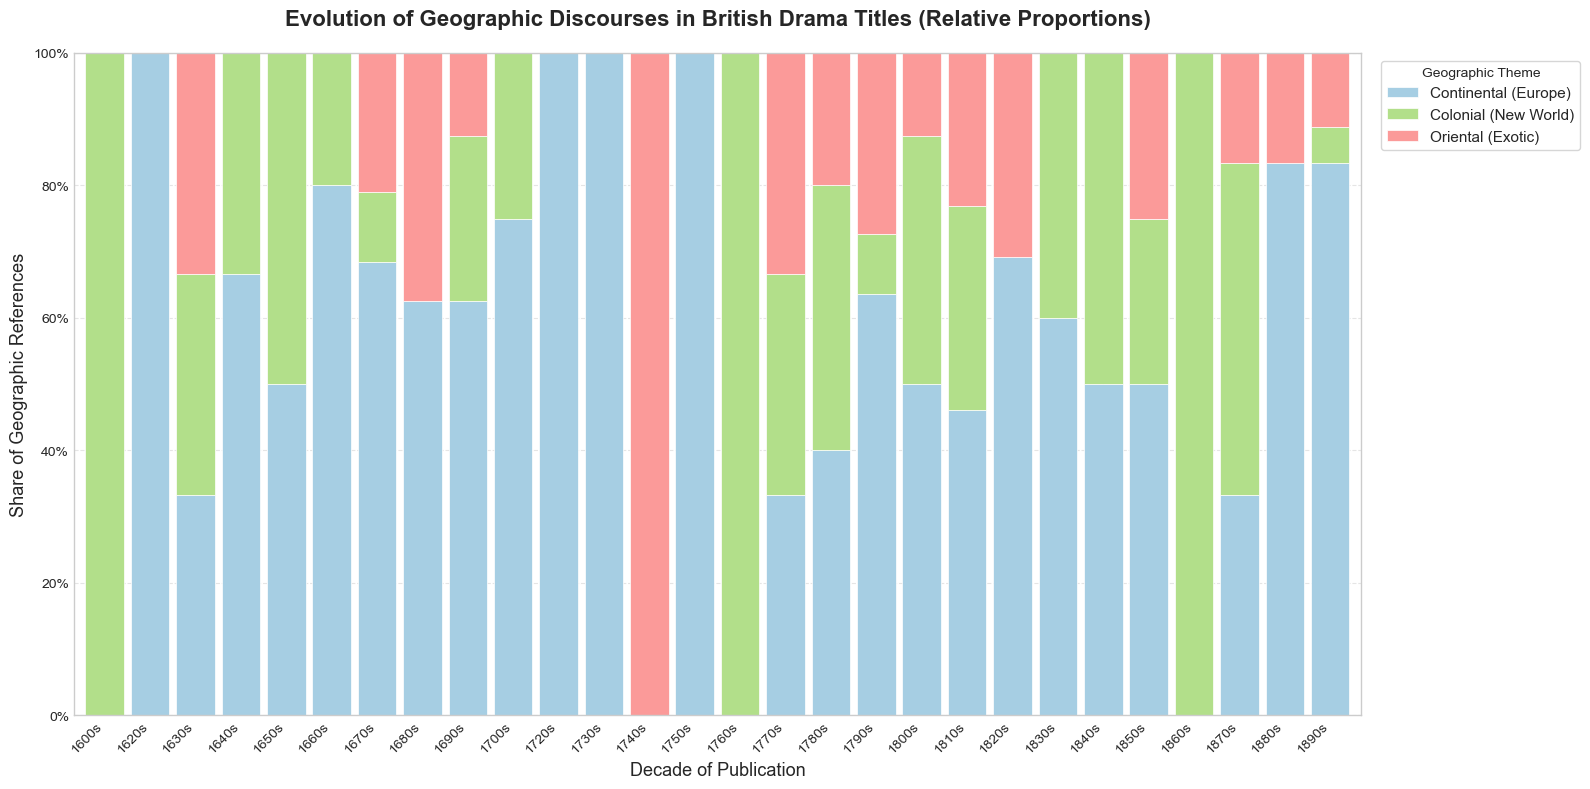

In [80]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns

# Ensure the DataFrame is sorted by Decade
counts = counts.sort_values('Decade_Label')

# Set 'Decade_Label' as the index for the X-axis
# Select the PERCENTAGE columns calculated in Step 3
plot_data = counts.set_index('Decade_Label')[['Pct_Continental', 'Pct_Colonial', 'Pct_Oriental']]

# Rename columns for the Legend
plot_data.columns = ['Continental (Europe)', 'Colonial (New World)', 'Oriental (Exotic)']

# Fill NaN with 0
plot_data = plot_data.fillna(0)

# Setup Plot Style

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif' 

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Generate 100% Stacked Bar Chart
plot_data.plot(kind='bar', 
               stacked=True, 
               ax=ax, 
               width=0.85, 
               color=['#a6cee3', '#b2df8a', '#fb9a99'], # Academic pastel colors
               edgecolor='white', 
               linewidth=0.5)

# Polish and Annotate
# Title & Labels
plt.title('Evolution of Geographic Discourses in British Drama Titles (Relative Proportions)', 
          fontsize=16, weight='bold', pad=20)
plt.xlabel('Decade of Publication', fontsize=13)
plt.ylabel('Share of Geographic References', fontsize=13)

# Fix X-axis Labels (Rotate 45 degrees)
plt.xticks(rotation=45, ha='right', fontsize=10)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Move Legend outside to the right
plt.legend(title='Geographic Theme', 
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           frameon=True, 
           fontsize=11)

# Add strict limits
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to make room for the external legend
plt.tight_layout()

plt.savefig('geographic_trends_plot_v2.png', dpi=300)
plt.show()


Methodology (Revised & Enhanced)

This section employs a hybrid methodology combining Computational Text Analysis and Culturomics to quantitatively mine British drama titles for geographic signals.

1. Dynamic Feature Extraction & Global Frequency Analysis

To capture the holistic lexical characteristics of the corpus, standard Natural Language Processing (NLP) preprocessing was applied to the cleaned title data.

Tokenization: Using Python’s re module, unstructured text titles were converted into a Bag-of-Words representation.

Frequency Profiling: The full corpus was scanned using collections.Counter to extract the Top 500 unigrams.

Purpose: This automated approach reduced selection bias, provided empirical support for constructing a high-coverage geographic dictionary, and ensured reproducibility for future corpus expansion.

2. Iterative Dictionary Construction (Hybrid Approach)

To ensure both precision and recall in geographic categorization, a hybrid, iterative strategy was employed:

Phase I – Seed Generation: Based on historical and cultural context, a preliminary list of "Seed Keywords" representing core nations or regions (e.g., France, China, America) was established.

Phase II – Contextual Expansion: A full-corpus dictionary scan and seed-based co-occurrence check was applied to identify additional low-frequency but historically relevant geographic terms. Due to the short titles and conceptual nature of seeds, most co-occurring words were general or thematic rather than new place names; therefore, this step served primarily to validate the keyword list rather than automatically expand it. Ambiguous or polysemous terms (e.g., Russian) were flagged for manual review and assigned to one of three categories where appropriate.

Phase III – Empirical Validation: The dictionary was cross-referenced against the Top 500 unigrams to confirm tendencies such as preference for city names over nations (e.g., Venice > Italy) or identity labels (e.g., Turk).

Resulting Taxonomy:
The vocabulary was categorized into three mutually exclusive semantic groups:

Continental: Traditional European powers and cultural centers (e.g., France, Rome, Venice), representing Old World political referents.

Colonial/New World: Americas, the Caribbean, and colonial expansion activities (e.g., Virginia, Plantation, Conquest), representing material empire-building.

Oriental/Exotic: Ottoman Empire and Far East (e.g., Turk, China, Persia, Tartary), representing cultural imaginaries of “Othering.”

3. Temporal Aggregation & Normalization

To account for uneven publication volumes across decades, relative frequencies rather than raw counts were calculated:

Aggregation: Data was grouped by Decade_Label (e.g., 1750s).

Pattern Matching: Regex-based vectorization (\bterm\b) was used to detect the presence of each geographic category in titles.

Normalization: The proportion of each category relative to total geographic mentions in that decade was calculated, allowing fair comparison over time and accurately reflecting each geographic discourse’s “Share of Voice.”

4. Visualization

Normalized data was visualized with 100% stacked bar charts using Matplotlib and Seaborn, highlighting temporal shifts in British drama from early Continental geopolitics toward Colonial expansion and Oriental imagination.

Core Tech Stack: Python (Pandas, Re, Collections, Matplotlib, Seaborn)

In [ ]:
Tableau 实现步骤 (保姆级教程) 1. 导入与处理数据 (Data Source 界面)
打开 Tableau，连接 Text File，选择你刚才生成的 geo_trends_by_decade.csv。
关键步骤 (The Magic Step)：

按住 Ctrl 键，选中 Continental、Colonial、Oriental 这三列（注意：选原始计数列，不要选 Pct_ 百分比列，让 Tableau 自己算百分比更灵活）。
右键点击选中的区域，选择 "Pivot" (转置)。


现在你会发现数据变长了。

把 Pivot Field Names 重命名为 "Region Category"。
把 Pivot Field Values 重命名为 "Count"。_


 2. 制作图表 (Sheet 界面)
X轴：把 Decade_Label 拖到 Columns。
Y轴：把 Count 拖到 Rows。
颜色：把 Region Category 拖到 Color 标记卡上。

此时你看到的是普通堆叠柱状图（数值高低不一）。


转换为 100% 比例：

右键点击行（Rows）里的 Count 胶囊。
选择 Quick Table Calculation (快速表计算) -> Percent of Total (总额百分比)。
再次 右键点击该胶囊 -> Compute Using (计算依据) -> Table (Down) (或者选择 Region Category)。
解释：我们要计算的是“在这一年里，各地区占比多少”，所以是垂直方向的计算。


 3. 美化 (Polishing)
颜色调整：双击左侧图例，手动修改颜色。

Continental -> 浅蓝 (Pastel Blue)
Colonial -> 浅绿 (Pastel Green)
Oriental -> 浅红 (Pastel Red)


添加参考线 (可选)：如果你想标记 50% 的位置，可以在 Y 轴右键 -> Add Reference Line。
排序：如果柱子里的颜色顺序不对（比如你希望欧洲在最下面），在图例（Legend）里直接拖拽颜色块上下移动即可。

### 3.3 Privatization of Dramas: from Public History to Domestic Secrets

In [97]:
import pandas as pd
import re
from collections import Counter
import os

INPUT_FILE = 'drama_master_cleaned_final.csv'

SEED_GROUPS = {
    'Public_Discovery': {'king', 'queen', 'royal', 'state', 'war', 'empire'},
    'Private_Discovery': {'husband', 'wife', 'family', 'home', 'marriage'}
}

STOPWORDS = set([
    'the', 'a', 'an', 'of', 'and', 'in', 'to', 'for', 'with', 'by', 'on', 'at', 'etc', 'or', 'more than', 'is', 'when', 'wherein',
    'drama', 'play', 'tragedy', 'comedy', 'opera', 'farce',
    'act', 'acts', 'scene', 'prologue', 'epilogue', 
    'new', 'old', 'edition', 'printed', 'volume', 'acted', 'majesty', 
    'one', 'two', 'three', 'four', 'five', 'first', 'second', 'third', 'iii'
])

def scan_cooccurrences():
    if not os.path.exists(INPUT_FILE):
        print(f"File not found: {INPUT_FILE}")
        return

    df = pd.read_csv(INPUT_FILE)
    
    title_col = next((c for c in ['Cleaned_Title', 'title (n)', 'Title'] if c in df.columns), None)
    if not title_col:
        print("Title column not found.")
        return

    print(f"Analyzing {len(df)} titles for contextual keywords\n")

    for group_name, seeds in SEED_GROUPS.items():
        found_words = Counter()
        
        for text in df[title_col].astype(str):
            words = re.findall(r'\b[a-z]{2,}\b', text.lower())
            word_set = set(words)
            
            if word_set & seeds:
                for w in word_set:
                    if w not in seeds and w not in STOPWORDS:
                        found_words[w] += 1
        
        print(f" Top Candidates for [{group_name}] ")
        for word, count in found_words.most_common(20):
            print(f"  • {word:<12} (co-occurs {count} times)")

if __name__ == "__main__":
    scan_cooccurrences()


Analyzing 1611 titles for contextual keywords

 Top Candidates for [Public_Discovery] 
  • historical   (co-occurs 16 times)
  • mary         (co-occurs 5 times)
  • elizabeth    (co-occurs 5 times)
  • edward       (co-occurs 5 times)
  • tragi        (co-occurs 4 times)
  • james        (co-occurs 4 times)
  • england      (co-occurs 4 times)
  • his          (co-occurs 4 times)
  • scots        (co-occurs 4 times)
  • great        (co-occurs 3 times)
  • love         (co-occurs 3 times)
  • death        (co-occurs 3 times)
  • henry        (co-occurs 3 times)
  • persia       (co-occurs 3 times)
  • birth        (co-occurs 2 times)
  • tale         (co-occurs 2 times)
  • dramatic     (co-occurs 2 times)
  • miller       (co-occurs 2 times)
  • mansfield    (co-occurs 2 times)
  • being        (co-occurs 2 times)
 Top Candidates for [Private_Discovery] 
  • man          (co-occurs 7 times)
  • more         (co-occurs 4 times)
  • than         (co-occurs 4 times)
  • secrets      (co

 Data Loaded: 1473 titles from 1660 to 1900
 Tagging titles with updated lexicons
Chart saved as 'public_private_trend_v2_refined.png'
Tableau dataset saved as 'tableau_public_private_refined.csv'


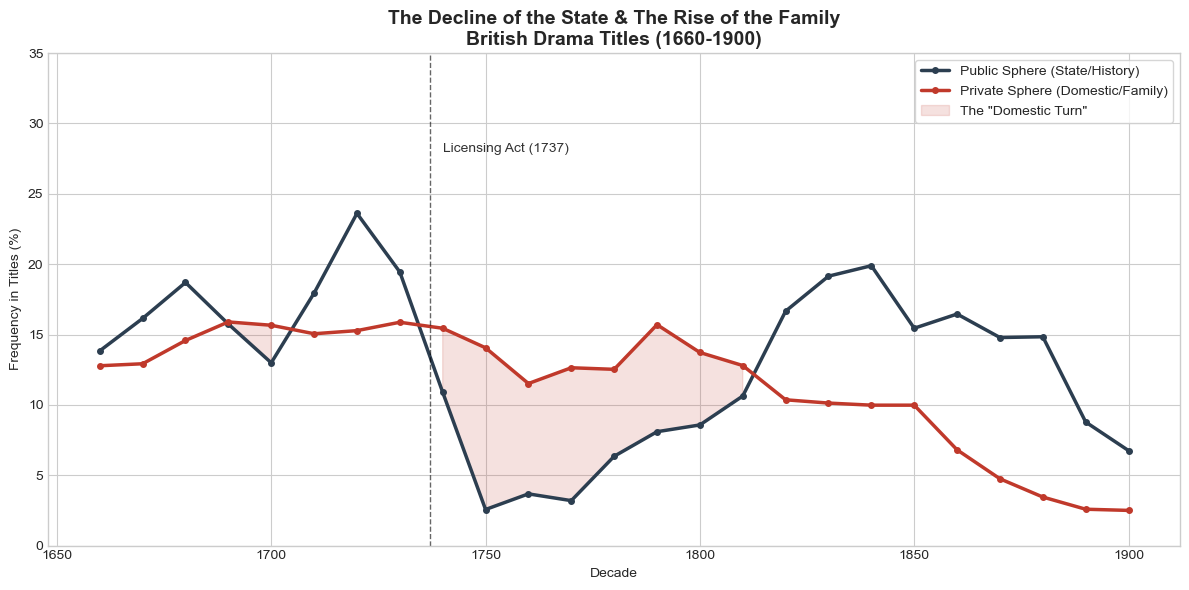

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

INPUT_FILE = 'drama_master_cleaned_final.csv' 
START_YEAR = 1660
END_YEAR = 1900
ROLLING_WINDOW = 3

#  UPDATED LEXICONS BASED ON CO-OCCURRENCE SCAN 
LEXICONS = {
    'Public_Sphere': [
        # Core Concepts
        'king', 'queen', 'prince', 'princess', 'royal', 'court', 'crown', 
        'throne', 'monarch', 'majesty', 'sovereign', 'empire', 'state',
        'parliament', 'senate', 'ambassador', 'governor', 'magistrate',
        'war', 'peace', 'victory', 'conquest', 'treaty',
        
        # Geopolitics (Validated by Scan)
        'england', 'britain', 'albion', 'rome', 'greece', 'persia', 'scots',
        
        # Specific Monarchs/History (Found by Scan - CRITICAL for 19th C.)
        'history', 'historical', 
        'richard', 'henry', 'charles', 'alexander', 
        'elizabeth', 'mary', 'james', 'edward', 'caesar'
    ],
    
    'Private_Sphere': [
        # Kinship Structure
        'husband', 'wife', 'father', 'mother', 'son', 'daughter', 
        'brother', 'sister', 'sisters', 'child', 'parent', 'widow', 'orphan', 
        'family', 'marriage', 'wedding', 'bride', 'bridegroom',
        
        # Domestic Spaces
        'home', 'house', 'chamber', 'closet', 'garden', 'cottage', 'domestic',
        
        # Emotional/Moral Interiority (Found by Scan)
        'jealous', 'jealousy', 'secret', 'secrets', 'fatal', 'fond',
        'reputation', 'honor', 'distress', 'divorce', 'elopement', 
        'vow', 'oath' # "Vow" is risky but often domestic; removed "Love" strictly.
    ]
}

if not os.path.exists(INPUT_FILE):
    # Fallback for testing
    INPUT_FILE = 'dh_group7_drama_251229.csv'

try:
    df = pd.read_csv(INPUT_FILE)
    
    # 2.1 Dynamic Column Detection
    year_col = next((c for c in ['Publication_Year', 'p year', 'clean_year'] if c in df.columns), None)
    title_col = next((c for c in ['Cleaned_Title', 'title (n)', 'Title'] if c in df.columns), None)
    
    if not year_col or not title_col:
        raise ValueError(f"Missing columns. Found: {df.columns.tolist()}")

    # 2.2 Standardize Year
    df['Year_Clean'] = pd.to_numeric(df[year_col], errors='coerce')
    df = df.dropna(subset=['Year_Clean'])
    
    # Filter Date Range
    df = df[(df['Year_Clean'] >= START_YEAR) & (df['Year_Clean'] <= END_YEAR)]
    
    # 2.3 Create Decade
    df['Decade'] = (df['Year_Clean'] // 10 * 10).astype(int)
    
    # 2.4 Text Preprocessing
    df['Title_Lower'] = df[title_col].astype(str).str.lower()
    
    print(f" Data Loaded: {len(df)} titles from {START_YEAR} to {END_YEAR}")

except Exception as e:
    print(f" Critical Error: {e}")
    exit()

# THE TAGGING ENGINE
print(" Tagging titles with updated lexicons")
analysis_metrics = []

for label, terms in LEXICONS.items():
    # Construct Regex: \b matches word boundaries to avoid partial matches
    # e.g., "state" won't match "statement"
    pattern = r'(?i)\b(?:' + '|'.join(terms) + r')\b'
    col_name = f'Has_{label}'
    
    # Apply tagging
    df[col_name] = df['Title_Lower'].str.contains(pattern, regex=True)
    analysis_metrics.append(col_name)

# AGGREGATION & SMOOTHING (The "Unified Pipeline")
all_decades = range(START_YEAR, END_YEAR + 10, 10)

# Calculate RAW Percentage per Decade
df_trend = df.groupby('Decade')[analysis_metrics].mean() * 100

# Reindex to handle missing decades (fills with NaN)
df_trend = df_trend.reindex(all_decades)

# APPLY SMOOTHING (Rolling Average)
# min_periods=1 is crucial: it shows data even if neighbors are missing
df_smooth = df_trend.rolling(window=ROLLING_WINDOW, center=True, min_periods=1).mean()

# VISUALIZATION
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))

colors = {'Has_Public_Sphere': '#2c3e50', 'Has_Private_Sphere': '#c0392b'}
labels = {'Has_Public_Sphere': 'Public Sphere (State/History)', 'Has_Private_Sphere': 'Private Sphere (Domestic/Family)'}

# Plot Main Lines
for metric in analysis_metrics:
    # dropna() allows plotting discontinuous lines if gaps exist
    valid_data = df_smooth[metric].dropna()
    ax.plot(valid_data.index, valid_data, 
            label=labels[metric], 
            color=colors[metric], 
            linewidth=2.5, 
            marker='o', markersize=4)

# Highlight the Area where Private > Public
df_interp = df_smooth.interpolate(method='linear')
ax.fill_between(df_interp.index, 
                df_interp['Has_Public_Sphere'], 
                df_interp['Has_Private_Sphere'],
                where=(df_interp['Has_Private_Sphere'] > df_interp['Has_Public_Sphere']),
                color='#c0392b', alpha=0.15, 
                label='The "Domestic Turn"')

# Add Historical Context Markers
ax.axvline(x=1737, color='black', linestyle='--', alpha=0.6, linewidth=1)
ax.text(1740, 28, 'Licensing Act (1737)', fontsize=10, rotation=0, color='#333')

# Formatting
ax.set_title(f"The Decline of the State & The Rise of the Family\nBritish Drama Titles ({START_YEAR}-{END_YEAR})", fontsize=14, fontweight='bold')
ax.set_ylabel("Frequency in Titles (%)")
ax.set_xlabel("Decade")
ax.set_ylim(0, 35) # Fix Y-axis scale for consistency
ax.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.savefig('public_private_trend_v2_refined.png', dpi=300)
print("Chart saved as 'public_private_trend_v2_refined.png'")

# Prepare data for Tableau (Long Format)
df_tableau = df_smooth.reset_index().rename(columns={'index': 'Decade'})
df_tableau = df_tableau.melt(id_vars=['Decade'], value_vars=analysis_metrics, 
                             var_name='Category', value_name='Percentage')

# Clean Category Names
df_tableau['Category'] = df_tableau['Category'].str.replace('Has_', '', regex=False)

# Add Volume Data (Context)
volume = df.groupby('Decade').size().reindex(all_decades).fillna(0).reset_index(name='Total_Titles')
df_tableau = pd.merge(df_tableau, volume, on='Decade', how='left')

df_tableau.to_csv('tableau_public_private_refined.csv', index=False)
print("Tableau dataset saved as 'tableau_public_private_refined.csv'")
